In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality.csv to winequality (2).csv


In [ ]:
data = pd.read_csv("winequality.csv")

In [ ]:
data.head()

fixed acidity  volatile acidity  citric acid residual sugar  chlorides  \
0            7.4              0.70         0.00            1.9      0.076   
1            7.8              0.88         0.00            2.6      0.098   
2            7.8              0.76         0.04            2.3      0.092   
3           11.2              0.28         0.56            1.9      0.075   
4           11.2              0.23         0.55            1.7      0.070   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968   3.2       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 15.0                  60.0   0.9800     ?       0.50   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.0        6

In [ ]:
data.tail()

fixed acidity  volatile acidity  citric acid residual sugar  chlorides  \
1598            6.2             0.600         0.08              2      0.090   
1599            5.9             0.550         0.10            2.2      0.062   
1600            6.3             0.510         0.13            2.3      0.076   
1601            5.9             0.645         0.12              2      0.075   
1602            6.0             0.310         0.47            3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1598                 32.0                  44.0  0.99490  3.45       0.58   
1599                 39.0                  51.0  0.99512  3.52       0.76   
1600                 29.0                  40.0  0.99574  3.42       0.75   
1601                 32.0                  44.0  0.99547  3.57       0.71   
1602                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1598     10.5        5  
1599     11.2        6  
1600     11.0        6  
1601     10.2        5  
1602     11.0        6

In [ ]:
data.shape

(1603, 12)

In [ ]:
data.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid residual sugar  chlorides  \
0               7.4             0.700         0.00            1.9      0.076   
1               7.8             0.880         0.00            2.6      0.098   
2               7.8             0.760         0.04            2.3      0.092   
3              11.2             0.280         0.56            1.9      0.075   
4              11.2             0.230         0.55            1.7      0.070   
...             ...               ...          ...            ...        ...   
1598            6.2             0.600         0.08              2      0.090   
1599            5.9             0.550         0.10            2.2      0.062   
1600            6.3             0.510         0.13            2.3      0.076   
1601            5.9             0.645         0.12              2      0.075   
1602            6.0             0.310         0.47            3.6      0.067   

     

**DATA CLEANING**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1603 non-null   float64
 1   volatile acidity      1603 non-null   float64
 2   citric acid           1603 non-null   float64
 3   residual sugar        1603 non-null   object 
 4   chlorides             1602 non-null   float64
 5   free sulfur dioxide   1603 non-null   float64
 6   total sulfur dioxide  1603 non-null   float64
 7   density               1603 non-null   float64
 8   pH                    1603 non-null   object 
 9   sulphates             1603 non-null   float64
 10  alcohol               1603 non-null   float64
 11  quality               1603 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 150.4+ KB


In [ ]:
data['residual sugar'] = pd.to_numeric(data['residual sugar'], errors='coerce')
data['pH'] = pd.to_numeric(data['pH'], errors='coerce')

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          1
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 0
dtype: int64


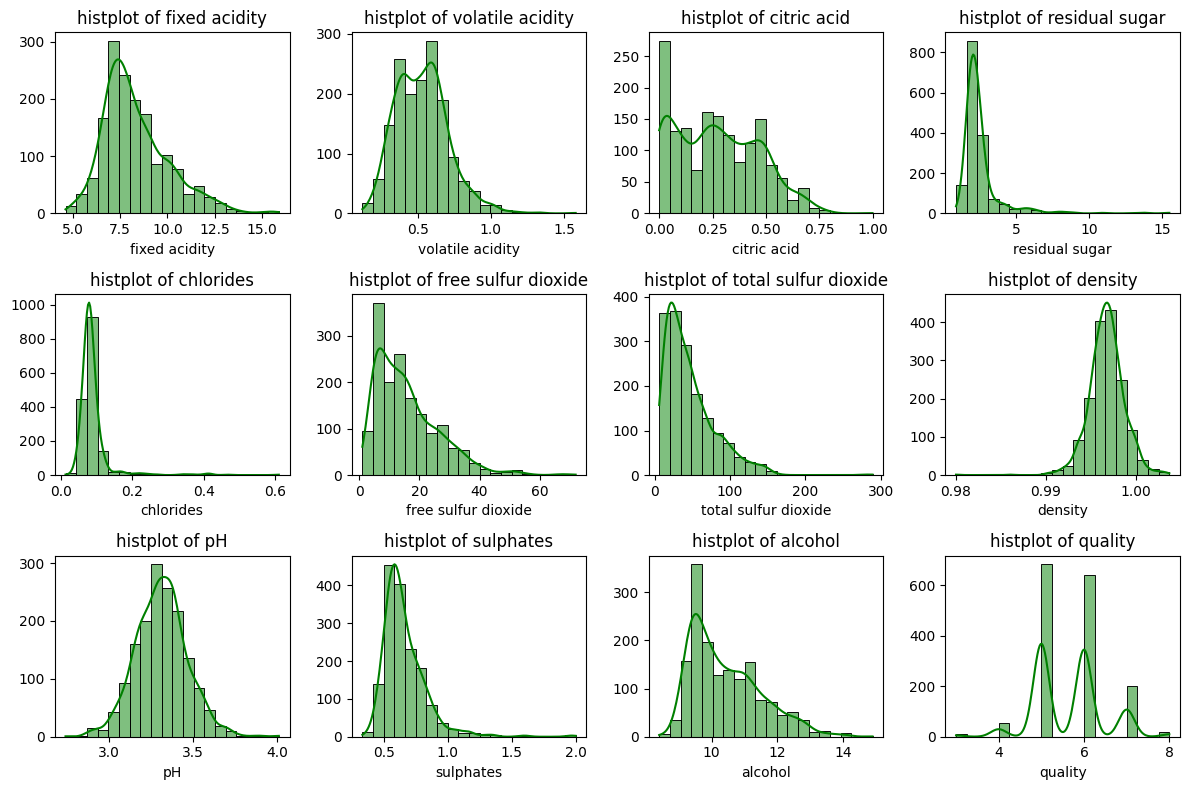

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 4, features.index(feature) + 1)
    sns.histplot(data[feature], color='green', bins=20, kde=True)
    plt.title(f'histplot of {feature}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

Histogram is a visual representation of the distribution of your data, providing insights into its central tendency, spread, skewness, and other important characteristics. It serves as a useful tool for exploratory data analysis (EDA) to understand the underlying structure of your dataset.

In [ ]:
median_value = data['residual sugar'].median()
data['residual sugar'].fillna(median_value, inplace=True)
median_value = data['chlorides'].median()
data['chlorides'].fillna(median_value, inplace=True)
mean_value = data['pH'].mean()
data['pH'].fillna(mean_value, inplace=True)


In [ ]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### **EDA**

In [ ]:
#to find the best optimum condition for  specific alcohol quality
from ipywidgets import interact
@interact #for dropdodwn box
def summary(wines=list(data['quality'].value_counts().index)):
    x=data[data['quality'] == wines]
    print("------------------------------------------------")
    print("Statistics for fixed acidity")
    print("Minimum fixed acidity required:", x['fixed acidity'].min())
    print("Average fixed acidity required:", x['fixed acidity'].mean())
    print("Maximum fixed acidity required:", x['fixed acidity'].max())
    print("------------------------------------------------")
    print("Statistics for volatile acidity")
    print("Minimum volatile acidity required:", x['volatile acidity'].min())
    print("Average volatile acidity required:",x['volatile acidity'].mean())
    print("Maximum volatile acidity required:",x['volatile acidity'].max())
    print("------------------------------------------------")
    print("Statistics for citric acid")
    print("Minimum citric acid required:",x['citric acid'].min())
    print("Average citric acid required:",x['citric acid'].mean())
    print("Maximum citric acid required:",x['citric acid'].max())
    print("------------------------------------------------")
    print("Statistics for residual sugar")
    print("Minimum residual sugar required:{0:.2f}".format(x['residual sugar'].min()))
    print("Average residual sugar required:{0:.2f}".format(x['residual sugar'].mean()))
    print("Maximum residual sugar required:{0:.2f}".format(x['residual sugar'].max()))
    print("------------------------------------------------")
    print("Statistics for chlorides")
    print("Minimum chlorides required:{0:.2f}".format(x['chlorides'].min()))
    print("Average chlorides required:{0:.2f}".format(x['chlorides'].mean()))
    print("Maximum chlorides required:{0:.2f}".format(x['chlorides'].max()))
    print("------------------------------------------------")
    print("Statistics for density")
    print("Minimum density required:{0:.2f}".format(x['density'].min()))
    print("Average density required:{0:.2f}".format(x['density'].mean()))
    print("Maximum density required:{0:.2f}".format(x['density'].max()))
    print("------------------------------------------------")
    print("Statistics for pH")
    print("Minimum pH required:{0:.2f}".format(x['pH'].min()))
    print("Average pH required:{0:.2f}".format(x['pH'].mean()))
    print("Maximum pH require:{0:.2f}".format(x['pH'].max()))
    print("------------------------------------------------")
    print("Statistics for sulphates")
    print("Minimum sulphates required:{0:.2f}".format(x['sulphates'].min()))
    print("Average sulphates required:{0:.2f}".format(x['sulphates'].mean()))
    print("Maximum sulphates required:{0:.2f}".format(x['sulphates'].max()))
    print("------------------------------------------------")
    print("Statistics for alcohol")
    print("Minimum alcohol required:{0:.2f}".format(x['alcohol'].min()))
    print("Average alcohol required:{0:.2f}".format(x['alcohol'].mean()))
    print("Maximum alcohol required:{0:.2f}".format(x['alcohol'].max()))
    print("------------------------------------------------")
    print("Statistics for free sulfur dioxide")
    print("Minimum free sulfur dioxide required:{0:.2f}".format(x['free sulfur dioxide'].min()))
    print("Average free sulfur dioxide required:{0:.2f}".format(x['free sulfur dioxide'].mean()))
    print("Maximum free sulfur dioxide required:{0:.2f}".format(x['free sulfur dioxide'].max()))
    print("------------------------------------------------")
    print("Statistics for total sulfur dioxide")
    print("Minimum total sulfur dioxide required:{0:.2f}".format(x['total sulfur dioxide'].min()))
    print("Average total sulfur dioxide required:{0:.2f}".format(x['total sulfur dioxide'].mean()))
    print("Maximum total sulfur dioxide required:{0:.2f}".format(x['total sulfur dioxide'].max()))
    print("------------------------------------------------")

interactive(children=(Dropdown(description='wines', options=(5, 6, 7, 4, 8, 3), value=5), Output()), _dom_clas…

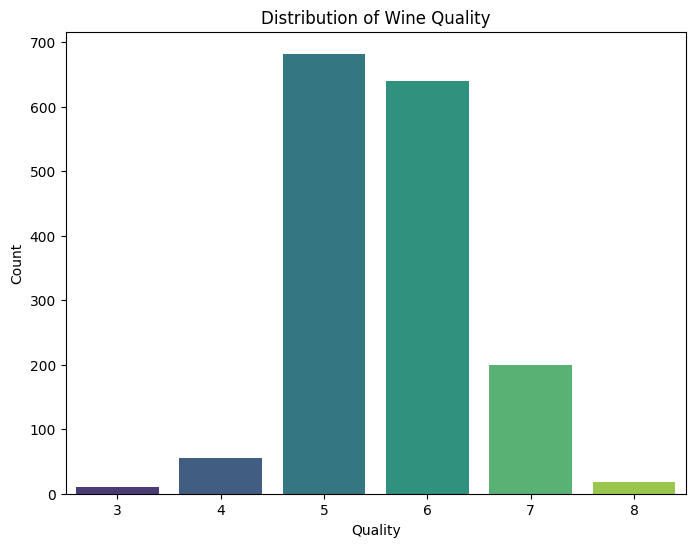

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Countplot visually represents the distribution of wine quality levels in the dataset, showing how many occurrences there are for each quality level. This type of plot is useful for understanding the balance and distribution of different classes in a categorical variable, such as the quality of wine in this case.







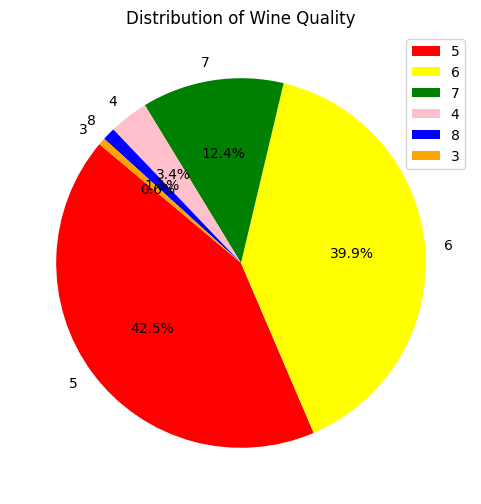

In [ ]:
type_counts = data['quality'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['red','yellow','green','pink','blue','orange'])
plt.title('Distribution of Wine Quality')
plt.legend()
plt.show()

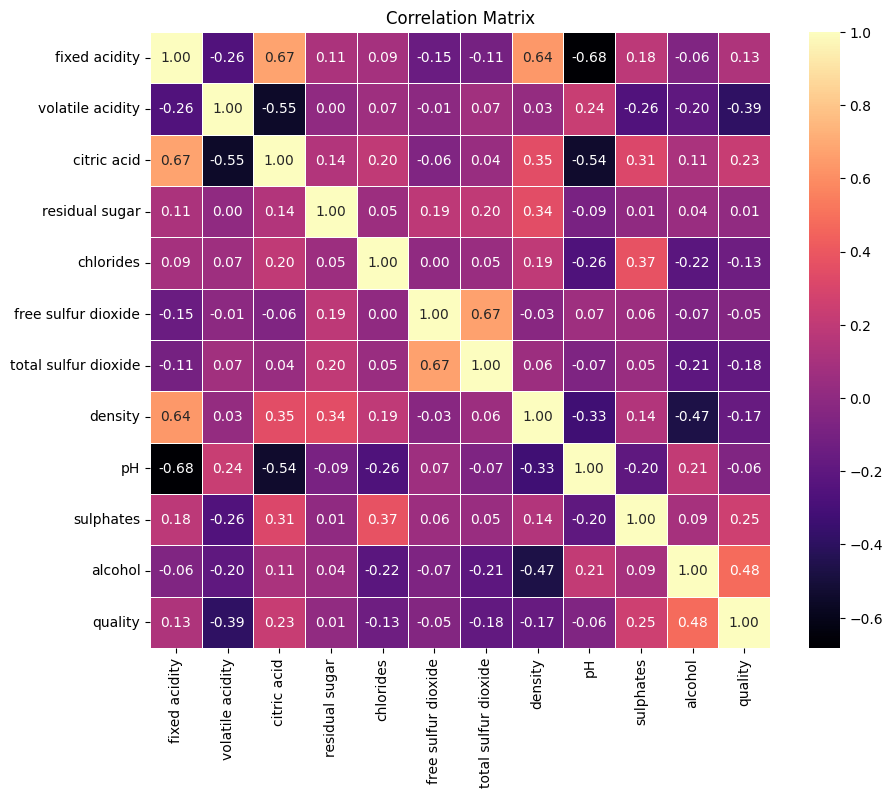

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Heatmap provides a visual representation of the correlation structure between different numerical features in the Wine dataset. Positive correlations are indicated by warmer colors, negative correlations by cooler colors, and no correlation by white. This visualization helps to identify patterns and relationships between variables, aiding in the understanding of how features are related to each other in the dataset.

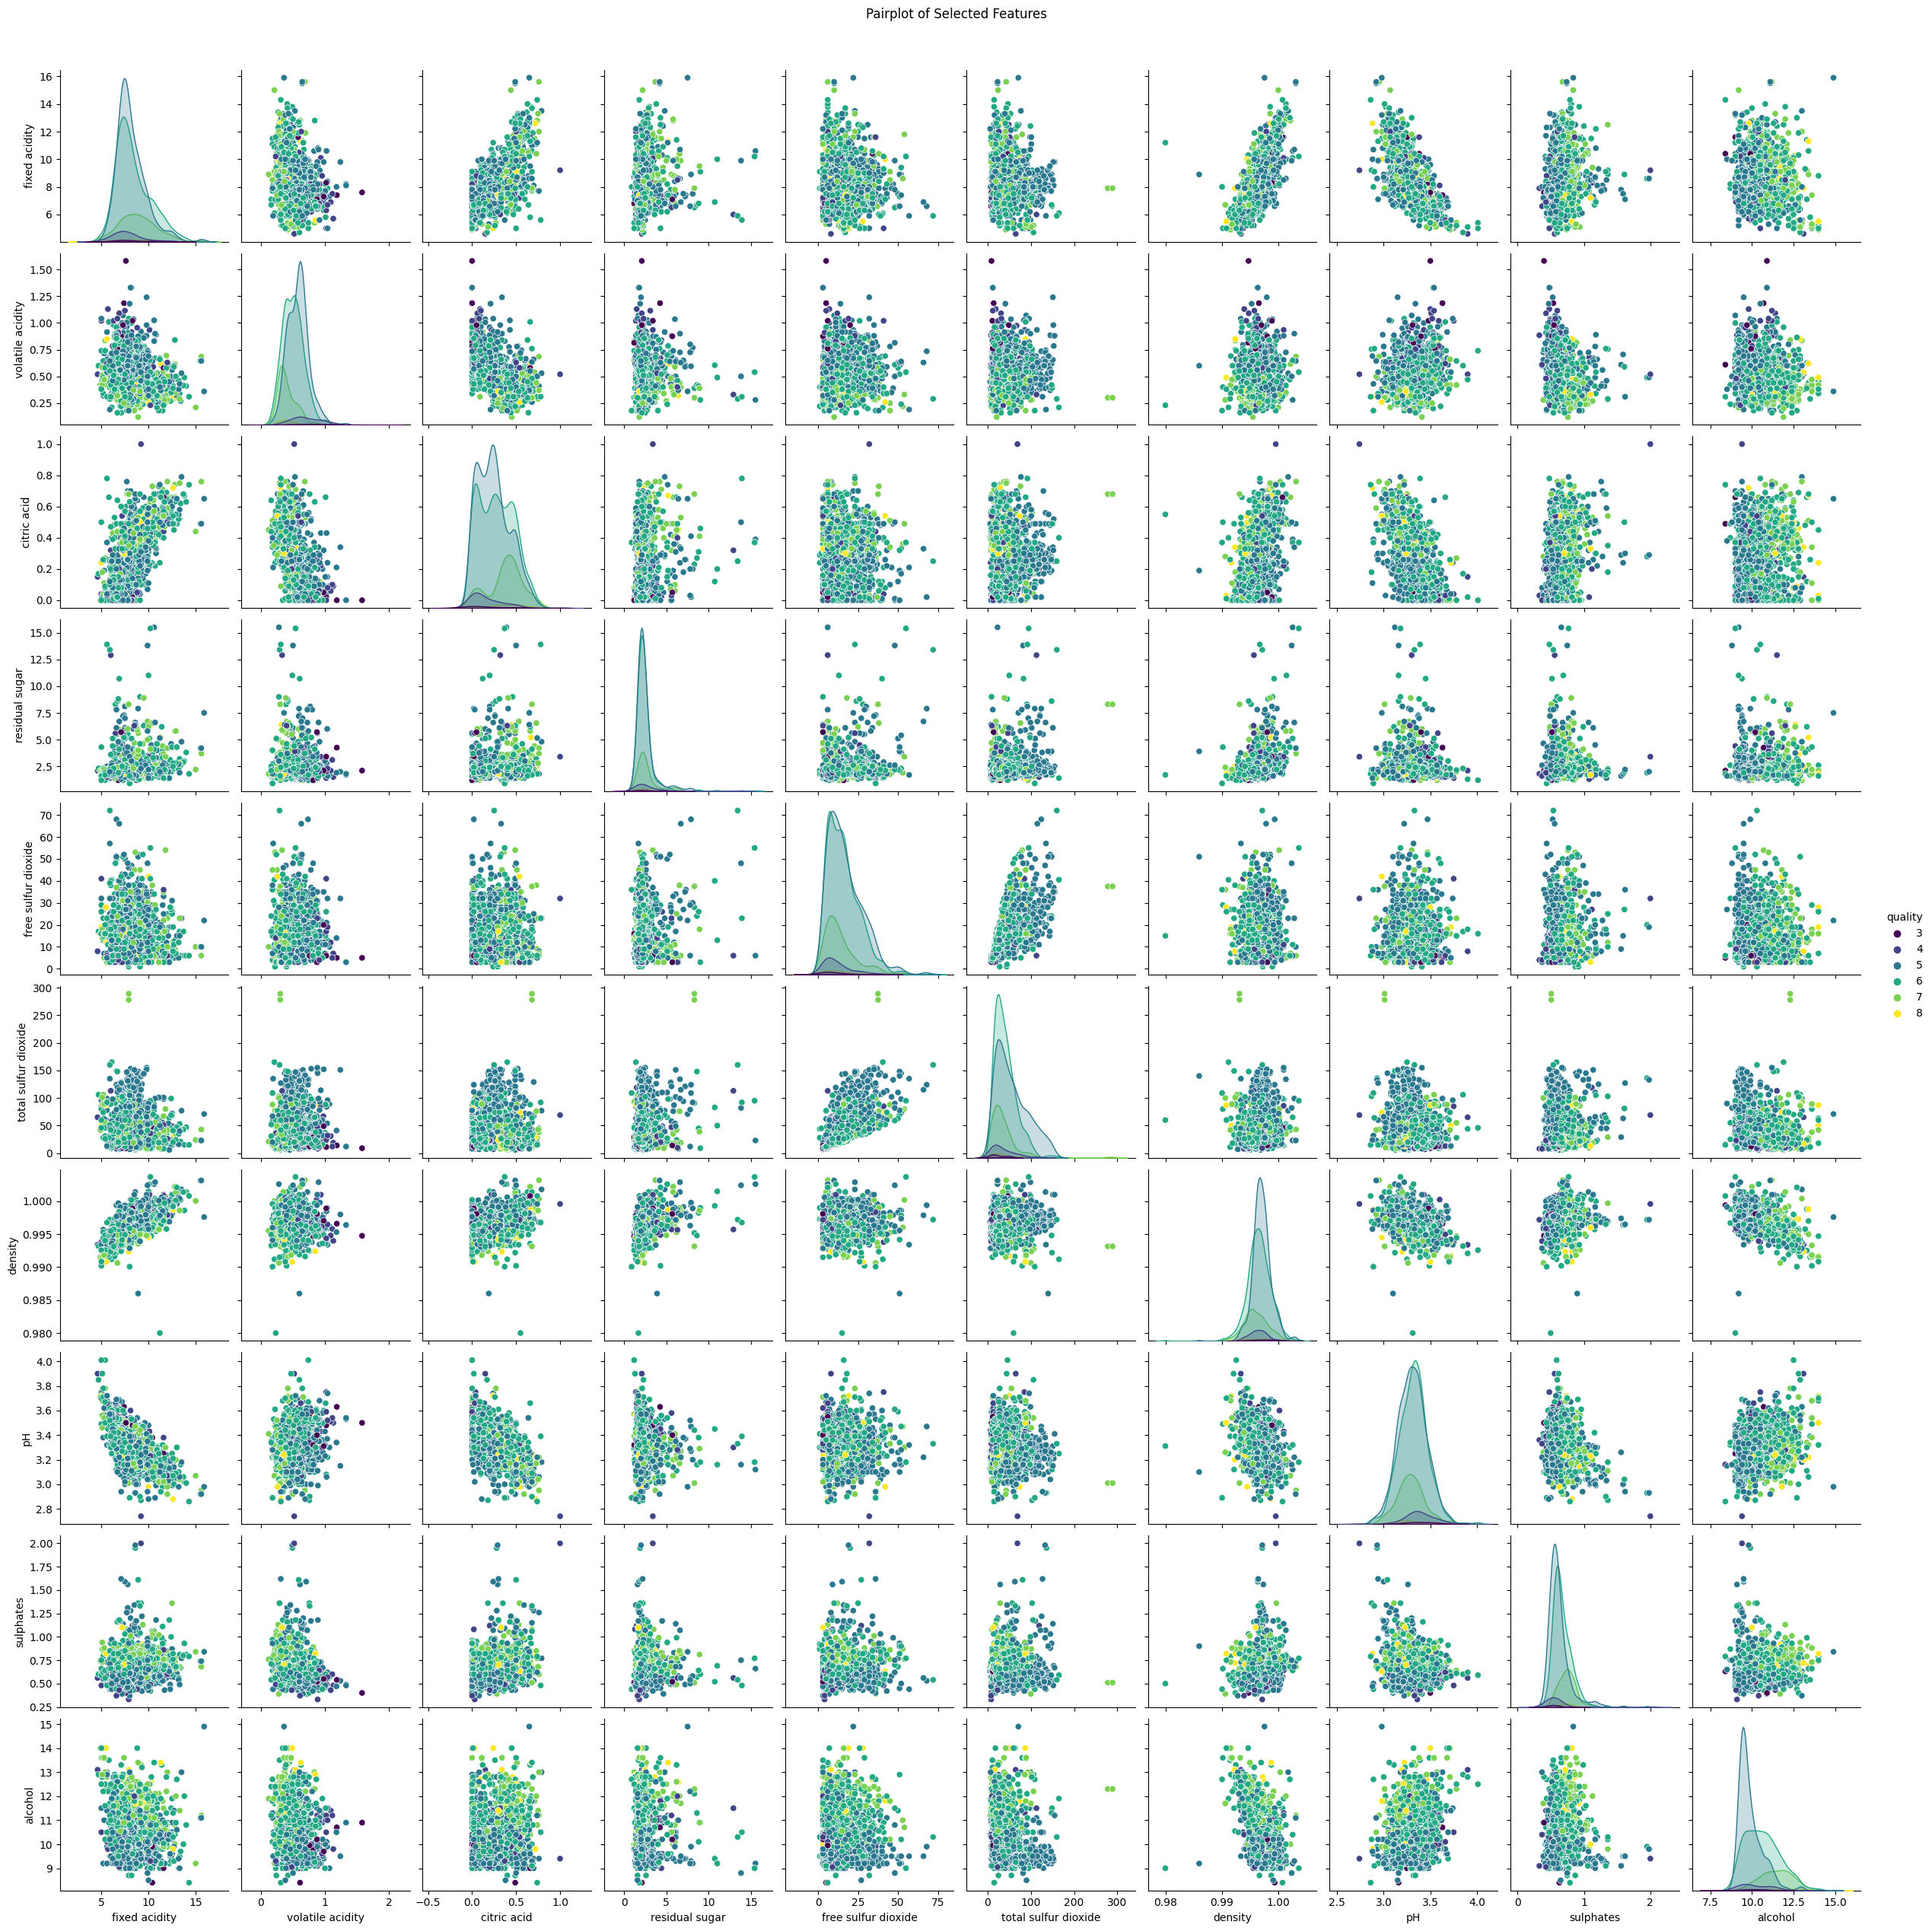

In [ ]:
selected_features = ['fixed acidity','volatile acidity','citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
sns.pairplot(data[selected_features], hue='quality', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

Pair plots are useful for understanding the joint distribution of multiple variables and can reveal potential correlations or trends between them. In this specific case, the pair plot helps in exploring how the selected features relate to each other and how they are associated with different wine quality levels.

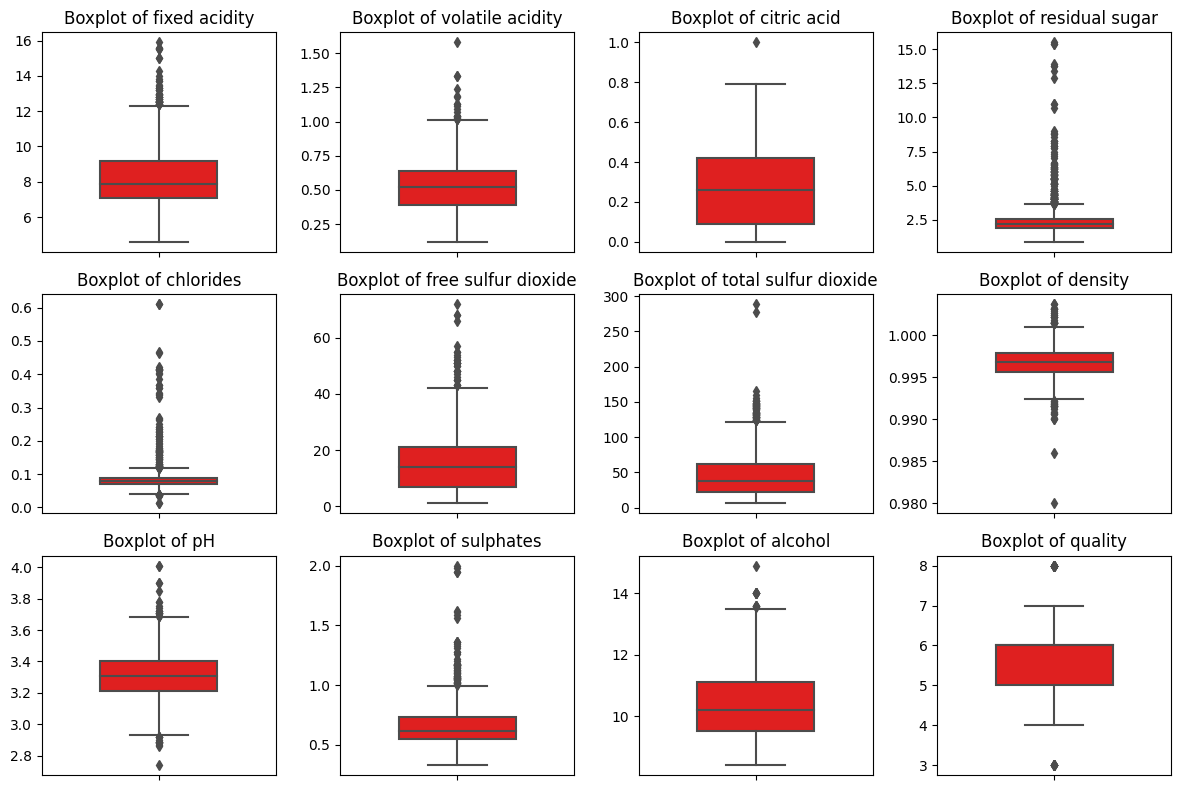

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 4, features.index(feature) + 1)
    sns.boxplot(data=data, y=feature, color='red', width=0.5)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

The boxplots provide insights into the central tendency, spread, and presence of outliers for each feature.

In [ ]:
from scipy import stats
import numpy as np
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']
z_scores = np.abs(stats.zscore(data[features]))
threshold = 3  # You can adjust the threshold as needed
outliers_z = np.where(z_scores > threshold)

data_no_outliers_z = data.drop(outliers_z[0])
# Method 2: Using IQR (Interquartile Range)
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 4.5 * IQR
upper_bound = Q3 + 4.5 * IQR
outliers_iqr = data[(data[features] < lower_bound) | (data[features] > upper_bound)]
data_no_outliers_iqr = data[~((data[features] < lower_bound) | (data[features] > upper_bound))]
# Display the DataFrames without outliers
print("DataFrame without outliers using Z-score:")
print(data_no_outliers_z)
print("\nDataFrame without outliers using IQR:")
print(data_no_outliers_iqr)

DataFrame without outliers using Z-score:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1598            6.2             0.600         0.08             2.0      0.090   
1599            5.9             0.550         0.10             2.2      0.062   
1600            6.3             0.510         0.13             2.3      0.076   
1601            5.9             0.645         0.12             2.0      0.075   
1602            6.0             0.310         0.47             3.6 

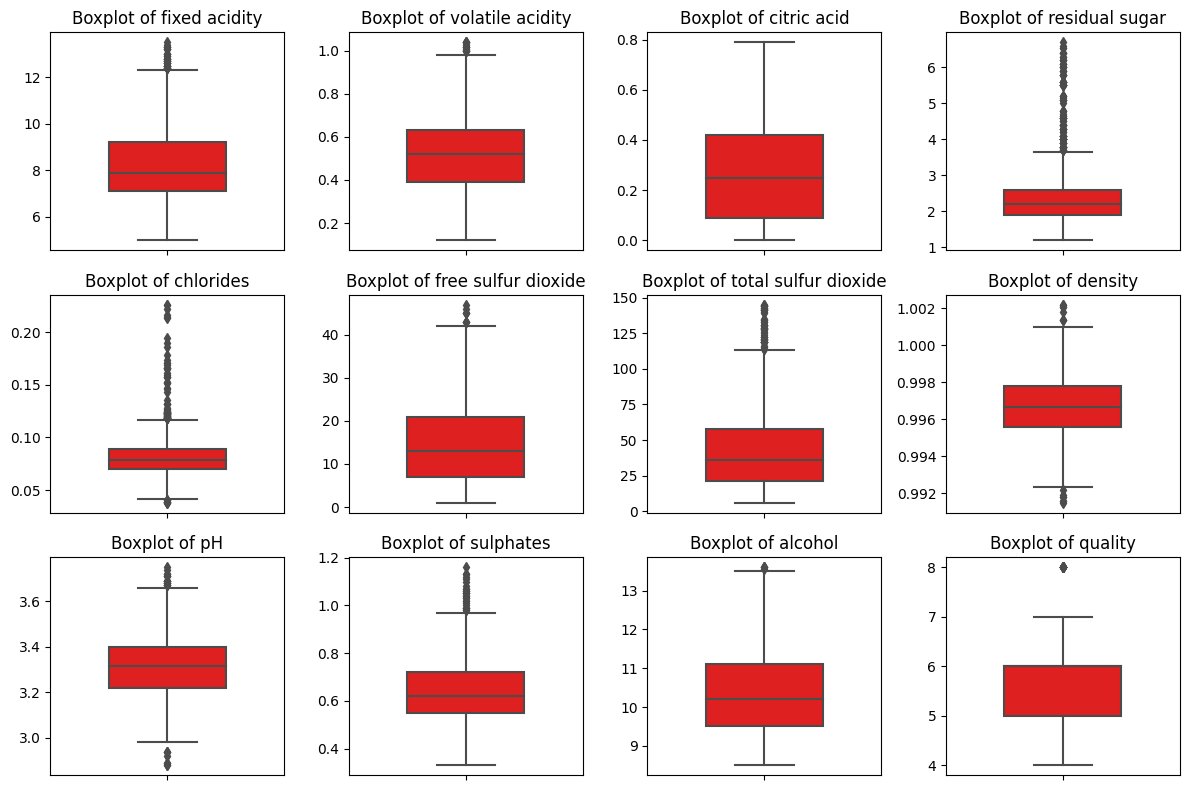

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 4, features.index(feature) + 1)
    sns.boxplot(data=data_no_outliers_z, y=feature, color='red', width=0.5)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# **`PERFORMING REGRESSION`**

In [ ]:
#splitting data into train test
from sklearn.model_selection import train_test_split
X = data.drop(['quality'], axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((1122, 11), (481, 11))

RANDOM FOREST(REGRESSION)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = random_forest_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2:.4f}')
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")


Mean Squared Error: 0.39585987525987526
R-squared (R2): 0.4247
MAE: 0.4612
MAPE: 8.7245%


SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

Mean Squared Error: 0.3959
R-squared: 0.4247
MAE: 0.4612
MAPE: 8.7245%


NAIVE BAYES (REGRESSION)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
nb_regressor = GaussianNB()
nb_regressor.fit(X_train, y_train)
y_pred = nb_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")

Mean Squared Error: 0.8358
R-squared: -0.2147
MAE: 0.6279
MAPE: 11.5550%


KNN(REGRESSION)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=25)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

MAE: 0.6141
MAPE: 11.3286%
Mean Squared Error: 0.5807
R-squared: 0.1560


LINEAR REGRESSION(REGRESSION)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2:.4f}')
#lower the mean square value best the model is

MAE: 0.5355
MAPE: 9.9938%
Mean Squared Error: 0.480732265224579
R-squared: 0.3013


In [ ]:
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 1.52130804e-02 -1.18126272e+00 -1.85172987e-01  2.63012823e-02
 -2.04330760e+00  2.13804612e-03 -3.10392072e-03 -1.42710567e+01
 -4.89860091e-01  9.23327565e-01  2.72726043e-01]
Intercept: 18.81182786371991


DECISION TREE(REGRESSION)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regression = DecisionTreeRegressor(max_depth=5)

In [ ]:
tree_regression.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_pred = tree_regression.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2:.4f}')

MAE: 0.5539
MAPE: 10.3522%
Mean Squared Error: 0.512793254701338
R-squared: 0.2547


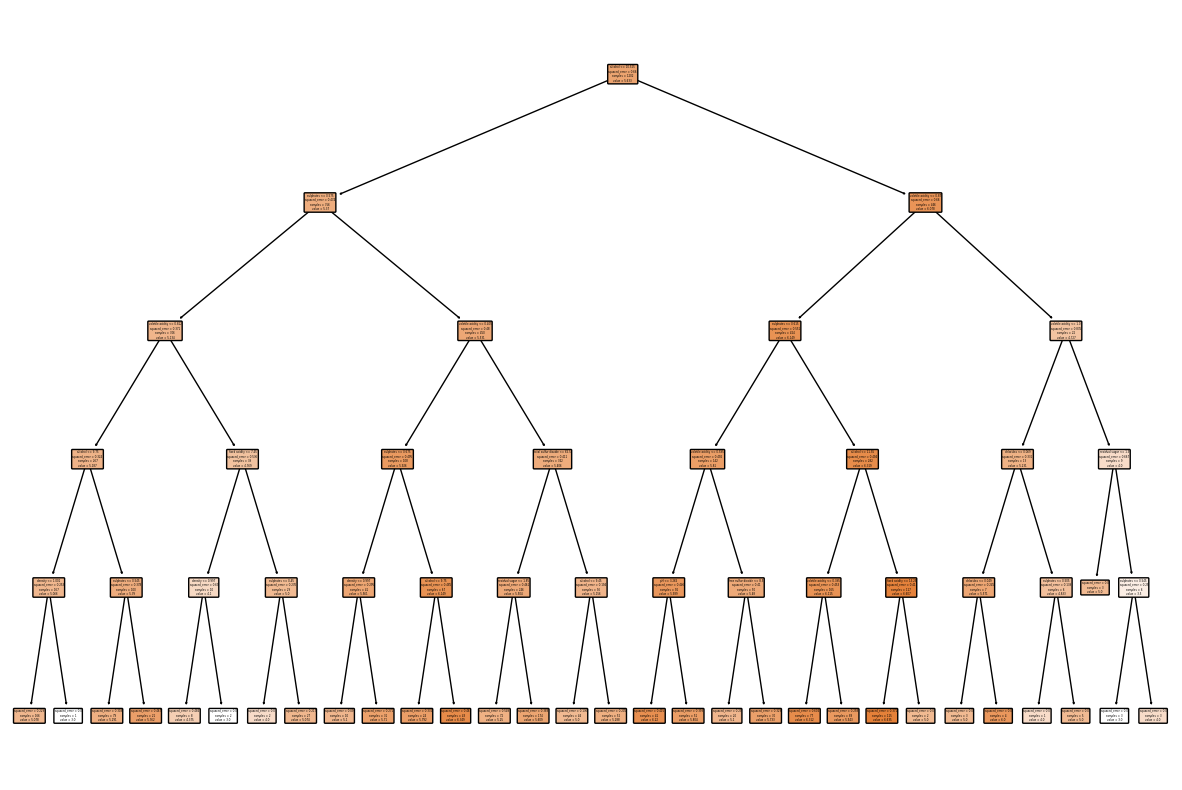

In [ ]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_regression, feature_names=X.columns, class_names=[str(i) for i in y.unique()], filled=True, rounded=True)
plt.show()

In [ ]:
#Lets check the accuracy of our model
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model = random_forest_regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)
import numpy as np
prediction = model.predict((np.array([[ 7.4, #fixed acidity
                                        0.7, #'volatile acidity',
                                        0, #'citric acid',
                                        1.9, #'residual sugar',
                                        0.076, #'chlorides',
                                        11, #'free sulfur dioxide',
                                        34, #'total sulfur dioxide',
                                        0.9978, #'density',
                                        3.51, #'pH',
                                        0.56, #'sulphates',
                                        9.4,  ]])))#for alcohol
print("The suggested quality for given features is:",prediction)

The suggested quality for given features is: [5.02]


XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2:.4f}')

MAE: 0.4512
MAPE: 8.5639%
Mean Squared Error: 0.4278587291659885
R-squared: 0.3781


AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
base_estimator = DecisionTreeRegressor(max_depth=2)  # You can customize the base estimator
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost_regressor.fit(X_train, y_train)
y_pred=adaboost_regressor.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2:.4f}')

MAE: 0.5635
MAPE: 10.5137%
Mean Squared Error: 0.48083910671575997
R-squared: 0.3011


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)
y_pred = gradient_boosting_regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2:.4f}')

MAE: 0.5023
MAPE: 9.4105%
Mean Squared Error: 0.43907280069147986
R-squared: 0.3619


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import xgboost as xgb


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"Metrics for {name}:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R-squared (R^2): {r2:.4f}")
    print("\n")


Metrics for Random Forest:
MSE: 0.3285
MAE: 0.4231
MAPE: 7.6360%
R-squared (R^2): 0.4735


Metrics for SVR:
MSE: 0.4994
MAE: 0.5467
MAPE: 9.8175%
R-squared (R^2): 0.1997


Metrics for Naive Bayes:
MSE: 0.6854
MAE: 0.5421
MAPE: 9.7804%
R-squared (R^2): -0.0983


Metrics for KNN:
MSE: 0.5514
MAE: 0.5751
MAPE: 10.2696%
R-squared (R^2): 0.1163


Metrics for Linear Regression:
MSE: 0.4285
MAE: 0.5156
MAPE: 9.2554%
R-squared (R^2): 0.3133


Metrics for Decision Tree:
MSE: 0.6168
MAE: 0.4860
MAPE: 8.7713%
R-squared (R^2): 0.0115


Metrics for XGBoost:
MSE: 0.3597
MAE: 0.4172
MAPE: 7.6080%
R-squared (R^2): 0.4236


Metrics for AdaBoost:
MSE: 0.3953
MAE: 0.5115
MAPE: 9.1853%
R-squared (R^2): 0.3665


Metrics for Gradient Boosting:
MSE: 0.3830
MAE: 0.4782
MAPE: 8.6062%
R-squared (R^2): 0.3862




Neaural Network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
import matplotlib.pyplot as plt

In [ ]:
# Split the data into training and testing sets
X = data.drop(['quality'], axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer=Adagrad(learning_rate=0.01), loss='mean_squared_error', metrics=['mse'])

In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

Epoch 1/1000
33/33 [==============================] - 0s 9ms/step - loss: 0.4150 - mse: 0.4150 - val_loss: 0.4452 - val_mse: 0.4452
Epoch 2/1000
33/33 [==============================] - 0s 11ms/step - loss: 0.4116 - mse: 0.4116 - val_loss: 0.4608 - val_mse: 0.4608
Epoch 3/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.4181 - mse: 0.4181 - val_loss: 0.4245 - val_mse: 0.4245
Epoch 4/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.4074 - mse: 0.4074 - val_loss: 0.4948 - val_mse: 0.4948
Epoch 5/1000
33/33 [==============================] - 0s 9ms/step - loss: 0.4097 - mse: 0.4097 - val_loss: 0.4203 - val_mse: 0.4203
Epoch 6/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.4099 - mse: 0.4099 - val_loss: 0.4168 - val_mse: 0.4168
Epoch 7/1000
33/33 [==============================] - 0s 10ms/step - loss: 0.4102 - mse: 0.4102 - val_loss: 0.4414 - val_mse: 0.4414
Epoch 8/1000
33/33 [==============================] - 0s 8ms/step - loss: 

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_pred=model.predict(X_test).flatten()
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print results
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R^2): {r2:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')

11/11 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.5663
Mean Absolute Error (MAE): 0.6196
R-squared (R^2): 0.0925
Mean Absolute Percentage Error (MAPE): 11.6457%


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming your data is loaded and processed with X_train, X_test, y_train, y_test

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print results
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')
print(f'R-squared (R^2): {r2:.4f}')


Epoch 1/1000
26/26 [==============================] - 3s 31ms/step - loss: 18.0337 - mse: 18.0337 - val_loss: 1.6520 - val_mse: 1.6520
Epoch 2/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.7292 - mse: 0.7292 - val_loss: 0.6568 - val_mse: 0.6568
Epoch 3/1000
26/26 [==============================] - 0s 14ms/step - loss: 0.5653 - mse: 0.5653 - val_loss: 0.6482 - val_mse: 0.6482
Epoch 4/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5221 - mse: 0.5221 - val_loss: 0.5347 - val_mse: 0.5347
Epoch 5/1000
26/26 [==============================] - 0s 9ms/step - loss: 0.4831 - mse: 0.4831 - val_loss: 0.5525 - val_mse: 0.5525
Epoch 6/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5286 - mse: 0.5286 - val_loss: 0.5623 - val_mse: 0.5623
Epoch 7/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.4886 - mse: 0.4886 - val_loss: 0.6044 - val_mse: 0.6044
Epoch 8/1000
26/26 [==============================] - 0s 7ms/step - lo